In [1]:
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

In [2]:
# OBS
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/CALIPSO/'
ncfile_obs=path+"CALIPSO_3DCloudFraction_climato_2008-2021_except_2016_CFMIP2_sat_3.1.4_r144x90.nc"
nc_obs = netCDF4.Dataset(ncfile_obs)

ncfile_alt_mid=path+"CALIPSO_3DCloudFraction_alt_mid.nc"
nc_alt_mid = netCDF4.Dataset(ncfile_alt_mid)

In [3]:
# LMDZ6A
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/LMDZ6A/'
ncfile_lmdz6a=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmthCOSP_3Dclcalipso_nan_r144x90.nc"
nc_lmdz6a = netCDF4.Dataset(ncfile_lmdz6a)

In [4]:
# GRID
lon = nc_obs.variables['lon'][:]
lat = nc_obs.variables['lat'][:]

lat_id = (lat <= -60) 
lat = lat[lat_id]

lon_est = lon[lon<=150]
lon_peninsule = lon[(lon> 280) & (lon<=305)]
lon_ouest = lon[(lon>150) & (lon<=170) | (lon>210)&(lon<=280) | (lon>340) &(lon<=360)]
lon_ice_shelves = lon[(lon>170) & (lon <=210) | (lon>305) & (lon <=340)]

lon_est_id = lon<=150
lon_peninsule_id = (lon> 280) & (lon<=305)
lon_ouest_id = (lon>150) & (lon<=170) | (lon>210)&(lon<=280) | (lon>340) &(lon<=360)
lon_ice_shelves_id = (lon>170) & (lon <=210) | (lon>305) & (lon <=340)

alt_mid = nc_alt_mid.variables['alt_mid'][:] #levels

In [5]:
alt_mid

masked_array(data=[ 0.24      ,  0.71999997,  1.2       ,  1.6800001 ,
                    2.16      ,  2.64      ,  3.12      ,  3.6       ,
                    4.08      ,  4.5600004 ,  5.04      ,  5.5200005 ,
                    6.        ,  6.4799995 ,  6.96      ,  7.4399996 ,
                    7.92      ,  8.4       ,  8.88      ,  9.360001  ,
                    9.84      , 10.32      , 10.8       , 11.280001  ,
                   11.76      , 12.24      , 12.719999  , 13.2       ,
                   13.68      , 14.16      , 14.639999  , 15.12      ,
                   15.6       , 16.08      , 16.56      , 17.04      ,
                   17.52      , 18.        , 18.48      , 18.96      ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [6]:
alt_low_id = alt_mid < 3.2
alt_mid_id = (alt_mid > 3.2) & (alt_mid < 6.5)
alt_high_id = alt_mid > 6.5

In [17]:
# VARIABLES - OBS
clobs_tot = np.mean(nc_obs.variables['clcalipso'][:,:,lat_id,:],axis=0)*100

# VARIABLES - LMDZ6A
cllmdz6a_tot = np.mean(nc_lmdz6a.variables['clcalipso'][:,:,lat_id,:],axis=0)*100

In [18]:
# FIRST DATA PROCESSING
# OBS
clobs_tot[(clobs_tot < 1) | (clobs_tot > 100)] = np.nan
# LMDZ6A
cllmdz6a_tot[(cllmdz6a_tot < 1) | (cllmdz6a_tot > 100)] = np.nan

In [19]:
# 4 ZONES

# OBS
clobs_est = clobs_tot[:,:,lon_est_id]
clobs_peninsule = clobs_tot[:,:,lon_peninsule_id]
clobs_ouest = clobs_tot[:,:,lon_ouest_id]
clobs_ice_shelves = clobs_tot[:,:,lon_ice_shelves_id]

# LMDZ6A
cllmdz6a_est = cllmdz6a_tot[:,:,lon_est_id]
cllmdz6a_peninsule = cllmdz6a_tot[:,:,lon_peninsule_id]
cllmdz6a_ouest = cllmdz6a_tot[:,:,lon_ouest_id]
cllmdz6a_ice_shelves = cllmdz6a_tot[:,:,lon_ice_shelves_id]

In [20]:
# 3 LAYERS PER ZONE

# OBS
clobs_tot_l = clobs_tot[alt_low_id,:,:]
clobs_tot_m = clobs_tot[alt_mid_id,:,:]
clobs_tot_h = clobs_tot[alt_high_id,:,:]

clobs_est_l = clobs_est[alt_low_id,:,:]
clobs_est_m = clobs_est[alt_mid_id,:,:]
clobs_est_h = clobs_est[alt_high_id,:,:]

clobs_peninsule_l = clobs_peninsule[alt_low_id,:,:]
clobs_peninsule_m = clobs_peninsule[alt_mid_id,:,:]
clobs_peninsule_h = clobs_peninsule[alt_high_id,:,:]

clobs_ouest_l = clobs_ouest[alt_low_id,:,:]
clobs_ouest_m = clobs_ouest[alt_mid_id,:,:]
clobs_ouest_h = clobs_ouest[alt_high_id,:,:]

clobs_ice_shelves_l = clobs_ice_shelves[alt_low_id,:,:]
clobs_ice_shelves_m = clobs_ice_shelves[alt_mid_id,:,:]
clobs_ice_shelves_h = clobs_ice_shelves[alt_high_id,:,:]

# LMDZ6A
cllmdz6a_tot_l = cllmdz6a_tot[alt_low_id,:,:]
cllmdz6a_tot_m = cllmdz6a_tot[alt_mid_id,:,:]
cllmdz6a_tot_h = cllmdz6a_tot[alt_high_id,:,:]

cllmdz6a_est_l = cllmdz6a_est[alt_low_id,:,:]
cllmdz6a_est_m = cllmdz6a_est[alt_mid_id,:,:]
cllmdz6a_est_h = cllmdz6a_est[alt_high_id,:,:]

cllmdz6a_peninsule_l = cllmdz6a_peninsule[alt_low_id,:,:]
cllmdz6a_peninsule_m = cllmdz6a_peninsule[alt_mid_id,:,:]
cllmdz6a_peninsule_h = cllmdz6a_peninsule[alt_high_id,:,:]

cllmdz6a_ouest_l = cllmdz6a_ouest[alt_low_id,:,:]
cllmdz6a_ouest_m = cllmdz6a_ouest[alt_mid_id,:,:]
cllmdz6a_ouest_h = cllmdz6a_ouest[alt_high_id,:,:]

cllmdz6a_ice_shelves_l = cllmdz6a_ice_shelves[alt_low_id,:,:]
cllmdz6a_ice_shelves_m = cllmdz6a_ice_shelves[alt_mid_id,:,:]
cllmdz6a_ice_shelves_h = cllmdz6a_ice_shelves[alt_high_id,:,:]

In [21]:
# SECOND DATA PROCESSING --> KEEP ONLY NON NAN VALUES, OBTAIN A 1D LIST

# TOTAL
idxl = np.isfinite(clobs_tot_l) & np.isfinite(cllmdz6a_tot_l)
idxm = np.isfinite(clobs_tot_m) & np.isfinite(cllmdz6a_tot_m)
idxh = np.isfinite(clobs_tot_h) & np.isfinite(cllmdz6a_tot_h)
clobs_tot_l = clobs_tot_l[idxl]
clobs_tot_m = clobs_tot_m[idxm]
clobs_tot_h = clobs_tot_h[idxh]
cllmdz6a_tot_l  = cllmdz6a_tot_l[idxl]
cllmdz6a_tot_m  = cllmdz6a_tot_m[idxm]
cllmdz6a_tot_h  = cllmdz6a_tot_h[idxh]

# EAST
idxl = np.isfinite(clobs_est_l) & np.isfinite(cllmdz6a_est_l)
idxm = np.isfinite(clobs_est_m) & np.isfinite(cllmdz6a_est_m)
idxh = np.isfinite(clobs_est_h) & np.isfinite(cllmdz6a_est_h)
clobs_est_l = clobs_est_l[idxl]
clobs_est_m = clobs_est_m[idxm]
clobs_est_h = clobs_est_h[idxh]
cllmdz6a_est_l  = cllmdz6a_est_l[idxl]
cllmdz6a_est_m  = cllmdz6a_est_m[idxm]
cllmdz6a_est_h  = cllmdz6a_est_h[idxh]

# PENINSULA
# EACH LEVEL FOR HIGH CLOUD FRACTION OVER PENINSULA
lmdz6a_dict = {}
obs_dict = {}
for i in range(12): #pas plus car fraction nulle au-dessus de ce niveau
    level = i
    obs = clobs_peninsule_h[level,:,:]
    lmdz6a = cllmdz6a_peninsule_h[level,:,:]
    idxh = np.isfinite(obs) & np.isfinite(lmdz6a)
    obs = obs[idxh]
    lmdz6a = lmdz6a[idxh]
    obs_dict[f'clobs_peninsule_h_{level}'] = obs
    lmdz6a_dict[f'cllmdz6a_peninsule_h_{level}'] = lmdz6a

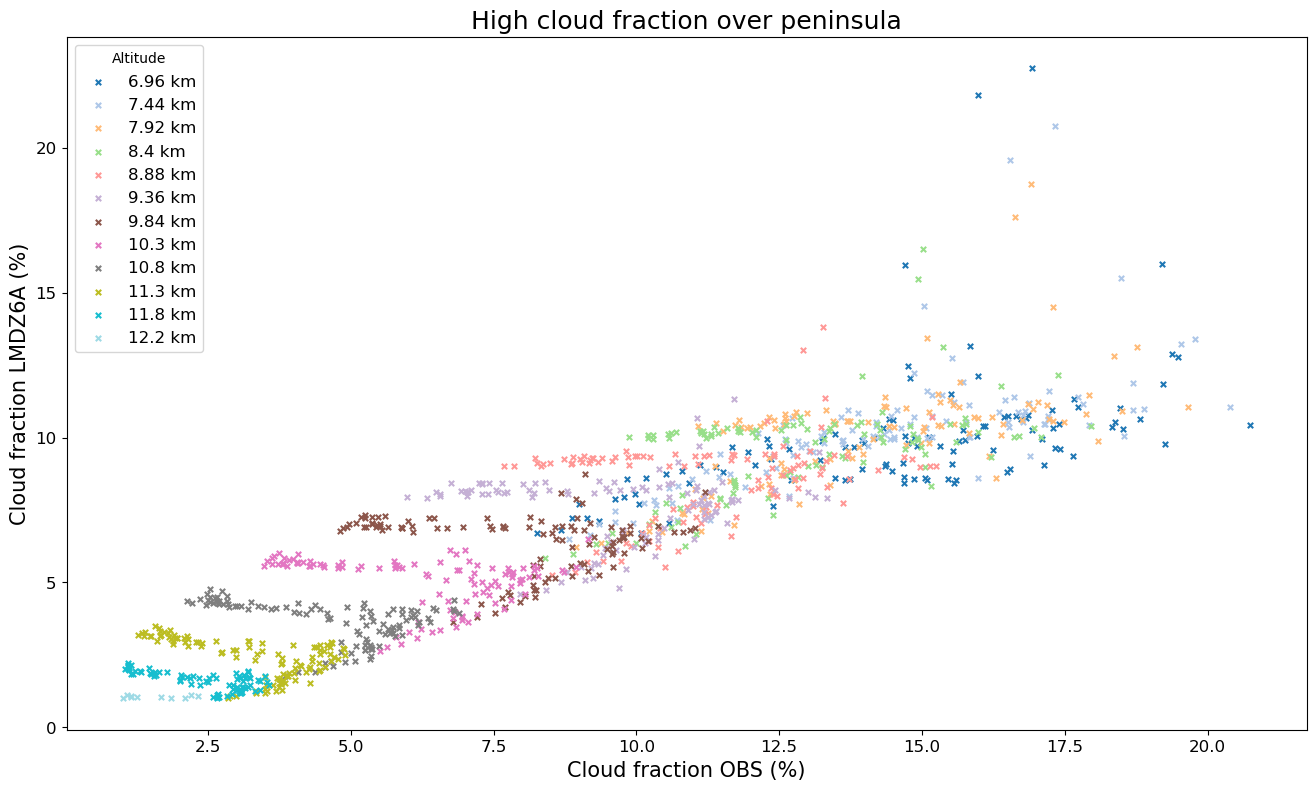

In [22]:
plt.figure(figsize=(16,9))
colors = plt.cm.tab20(np.linspace(0, 1, 12))
for i in range(12) :
    plt.scatter(obs_dict['clobs_peninsule_h_'+str(i)],lmdz6a_dict['cllmdz6a_peninsule_h_'+str(i)], marker='x', s=15, color=colors[i], label='{:2.3} km'.format(alt_mid[14+i]))
    plt.xlabel('Cloud fraction OBS (%)', size=15)
    plt.ylabel('Cloud fraction LMDZ6A (%)', size=15)
    plt.legend(title = 'Altitude', fontsize='large')
    plt.tick_params(axis='both', labelsize=12)
    plt.title('High cloud fraction over peninsula', size=18)

In [23]:
idxl = np.isfinite(clobs_peninsule_l) & np.isfinite(cllmdz6a_peninsule_l)
idxm = np.isfinite(clobs_peninsule_m) & np.isfinite(cllmdz6a_peninsule_m)
idxh = np.isfinite(clobs_peninsule_h) & np.isfinite(cllmdz6a_peninsule_h)
clobs_peninsule_l = clobs_peninsule_l[idxl]
clobs_peninsule_m = clobs_peninsule_m[idxm]
clobs_peninsule_h = clobs_peninsule_h[idxh]
cllmdz6a_peninsule_l  = cllmdz6a_peninsule_l[idxl]
cllmdz6a_peninsule_m  = cllmdz6a_peninsule_m[idxm]
cllmdz6a_peninsule_h  = cllmdz6a_peninsule_h[idxh]

# WEST
idxl = np.isfinite(clobs_ouest_l) & np.isfinite(cllmdz6a_ouest_l)
idxm = np.isfinite(clobs_ouest_m) & np.isfinite(cllmdz6a_ouest_m)
idxh = np.isfinite(clobs_ouest_h) & np.isfinite(cllmdz6a_ouest_h)
clobs_ouest_l = clobs_ouest_l[idxl]
clobs_ouest_m = clobs_ouest_m[idxm]
clobs_ouest_h = clobs_ouest_h[idxh]
cllmdz6a_ouest_l  = cllmdz6a_ouest_l[idxl]
cllmdz6a_ouest_m  = cllmdz6a_ouest_m[idxm]
cllmdz6a_ouest_h  = cllmdz6a_ouest_h[idxh]

# ICE SHELVES
idxl = np.isfinite(clobs_ice_shelves_l) & np.isfinite(cllmdz6a_ice_shelves_l)
idxm = np.isfinite(clobs_ice_shelves_m) & np.isfinite(cllmdz6a_ice_shelves_m)
idxh = np.isfinite(clobs_ice_shelves_h) & np.isfinite(cllmdz6a_ice_shelves_h)
clobs_ice_shelves_l = clobs_ice_shelves_l[idxl]
clobs_ice_shelves_m = clobs_ice_shelves_m[idxm]
clobs_ice_shelves_h = clobs_ice_shelves_h[idxh]
cllmdz6a_ice_shelves_l  = cllmdz6a_ice_shelves_l[idxl]
cllmdz6a_ice_shelves_m  = cllmdz6a_ice_shelves_m[idxm]
cllmdz6a_ice_shelves_h  = cllmdz6a_ice_shelves_h[idxh]

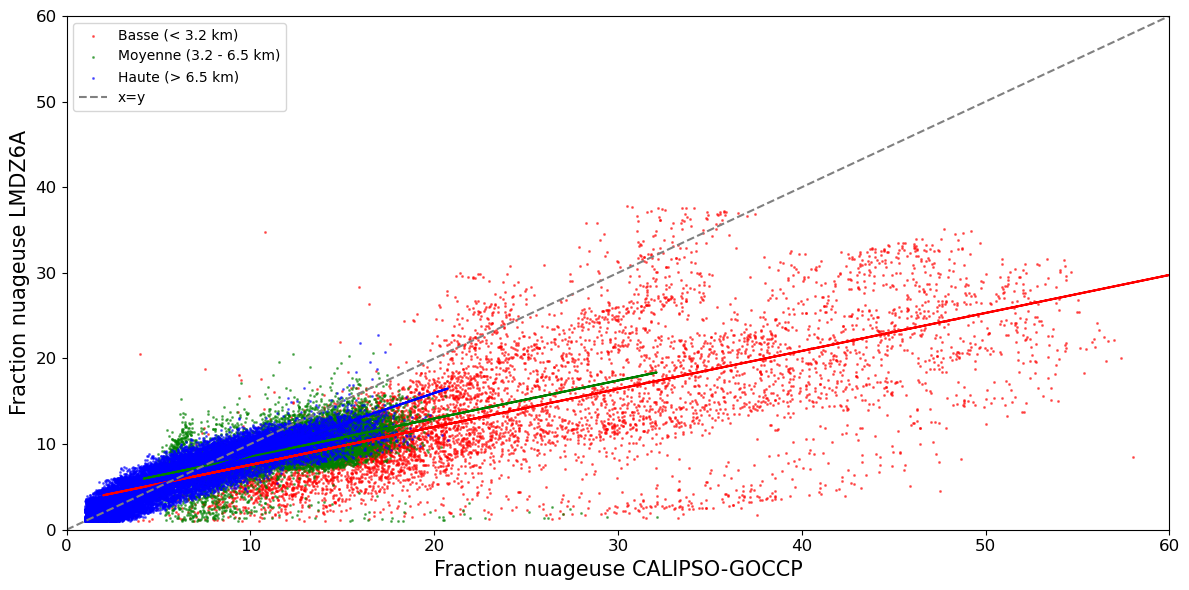

In [25]:
plt.figure(figsize=(12,6))
plt.scatter(clobs_tot_l,cllmdz6a_tot_l, s=5, c='r', marker='.', label='Basse (< 3.2 km)', alpha=0.5)
a,b = np.polyfit(clobs_tot_l, cllmdz6a_tot_l, 1)
r = np.corrcoef(clobs_tot_l,cllmdz6a_tot_l)[0,1]
plt.plot(clobs_tot_l, a*clobs_tot_l+b, '-', c='r')

plt.scatter(clobs_tot_m,cllmdz6a_tot_m, s=5, c='g', marker='.', label='Moyenne (3.2 - 6.5 km)', alpha=0.5)
a,b = np.polyfit(clobs_tot_m, cllmdz6a_tot_m, 1)
r = np.corrcoef(clobs_tot_m,cllmdz6a_tot_m)[0,1]
plt.plot(clobs_tot_m, a*clobs_tot_m+b, '-', c='g')

plt.scatter(clobs_tot_h,cllmdz6a_tot_h, s=5, c='b', marker='.', label='Haute (> 6.5 km)', alpha=0.5)
a,b = np.polyfit(clobs_tot_h, cllmdz6a_tot_h, 1)
r = np.corrcoef(clobs_tot_h,clobs_tot_h)[0,1]
plt.plot(clobs_tot_h, a*clobs_tot_h+b, '-', c='b')


plt.xlabel('Fraction nuageuse CALIPSO-GOCCP', size=15)
plt.ylabel('Fraction nuageuse LMDZ6A', size=15)
plt.xlim(0,60)
plt.ylim(0,60)
plt.axline((0, 0), slope=1, c='grey', linestyle='--', label='x=y')
plt.tick_params(axis='both', labelsize=12)
plt.legend()
plt.tight_layout()
path_fig = '/home/jcharrel/Documents/M2_Internship_LMD/figures/3DCloudFraction/correlations/'
plt.savefig(path_fig+'3DCloudFraction_climato_correlation_total.png',dpi=300)

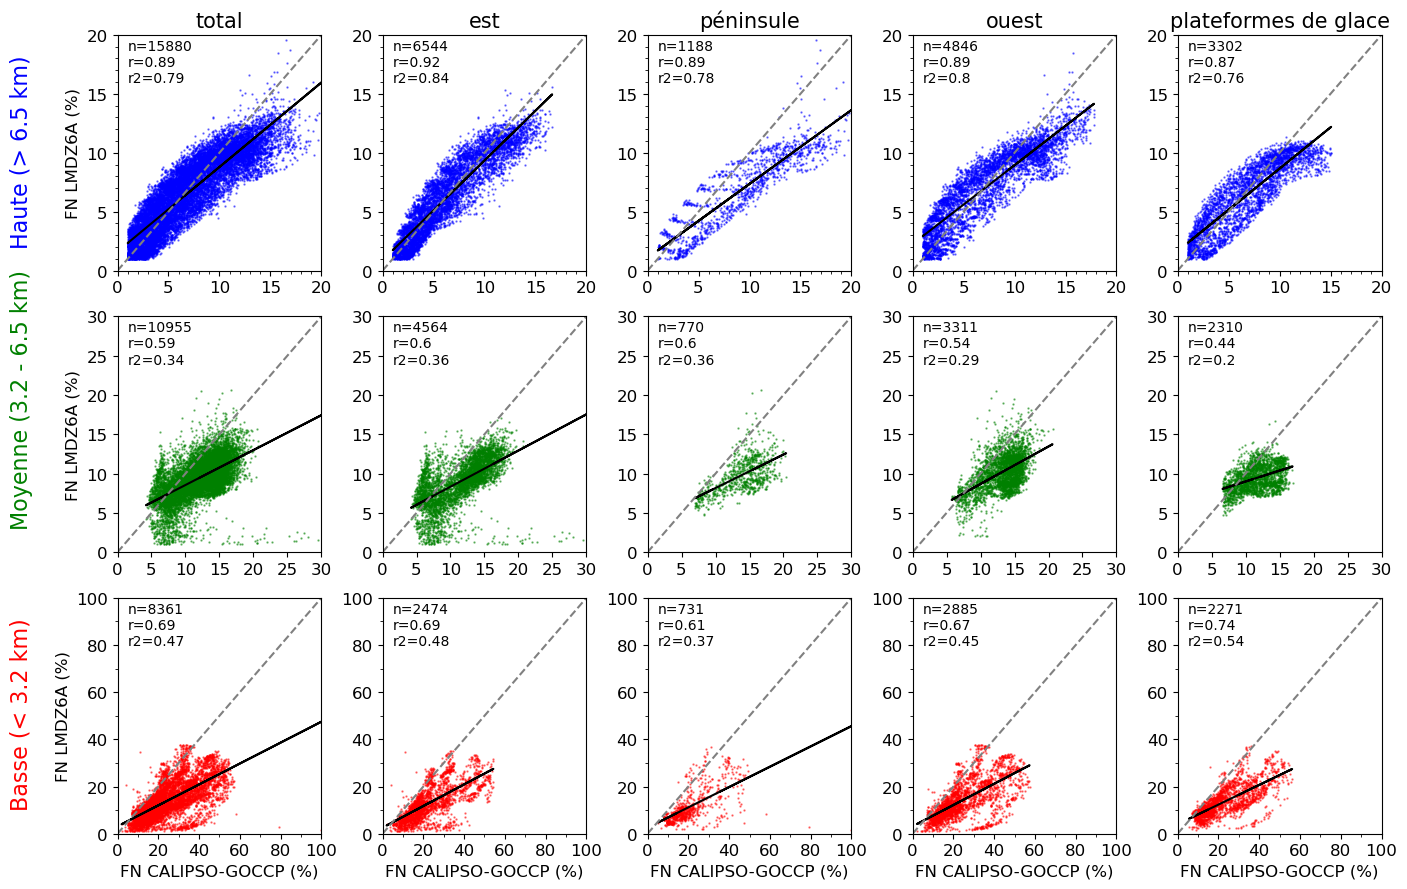

In [30]:
fig, axes = plt.subplots(figsize=(16,9), nrows=3, ncols=5)
pltcounter = 0 ; altcounter = 0 ; counter=0

fig.text(0.04, 0.825, 'Haute (> 6.5 km)', c='b', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.04, 0.5, 'Moyenne (3.2 - 6.5 km)', c='g', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.04, 0.2, 'Basse (< 3.2 km)', c='r', fontsize=16, va='center', ha='center', rotation='vertical')
label=None

for plotid in axes.flat:
    pltcounter = pltcounter + 1
    altcounter = (pltcounter - 1) % 4 + 1
        
    if pltcounter == 1 :
        plotid.set_title('total', size=15)
        clobs_plot = clobs_tot_h
        cllmdz6a_plot = cllmdz6a_tot_h
    if pltcounter == 2 : 
        plotid.set_title('est', size=15)
        clobs_plot = clobs_est_h
        cllmdz6a_plot = cllmdz6a_est_h
    if pltcounter == 3 : 
        plotid.set_title('péninsule', size=15)
        clobs_plot = clobs_peninsule_h
        cllmdz6a_plot = cllmdz6a_peninsule_h
    if pltcounter == 4 : 
        plotid.set_title('ouest', size=15)
        clobs_plot = clobs_ouest_h
        cllmdz6a_plot = cllmdz6a_ouest_h
    if pltcounter == 5 :
        plotid.set_title('plateformes de glace', size=15)
        clobs_plot = clobs_ice_shelves_h
        cllmdz6a_plot = cllmdz6a_ice_shelves_h
    if pltcounter == 6 :
        clobs_plot = clobs_tot_m
        cllmdz6a_plot = cllmdz6a_tot_m
    if pltcounter == 7 :
        clobs_plot = clobs_est_m
        cllmdz6a_plot = cllmdz6a_est_m
    if pltcounter == 8 :
        clobs_plot = clobs_peninsule_m
        cllmdz6a_plot = cllmdz6a_peninsule_m
    if pltcounter == 9 :
        clobs_plot = clobs_ouest_m
        cllmdz6a_plot = cllmdz6a_ouest_m
    if pltcounter == 10 :
        clobs_plot = clobs_ice_shelves_m
        cllmdz6a_plot = cllmdz6a_ice_shelves_m
    if pltcounter == 11 :
        clobs_plot = clobs_tot_l
        cllmdz6a_plot = cllmdz6a_tot_l
    if pltcounter == 12 :
        clobs_plot = clobs_est_l
        cllmdz6a_plot = cllmdz6a_est_l
    if pltcounter == 13 :
        clobs_plot = clobs_peninsule_l
        cllmdz6a_plot = cllmdz6a_peninsule_l
    if pltcounter == 14 :
        clobs_plot = clobs_ouest_l
        cllmdz6a_plot = cllmdz6a_ouest_l
    if pltcounter == 15 :
        clobs_plot = clobs_ice_shelves_l
        cllmdz6a_plot = cllmdz6a_ice_shelves_l
        label = 'x=y'
    if pltcounter in [11,12,13,14,15] :
        plotid.set_xlabel('FN CALIPSO-GOCCP (%)', size=12)
    if pltcounter in [1,6,11]: 
        plotid.set_ylabel('FN LMDZ6A (%)', size=12)

    if pltcounter in [1,2,3,4,5]:
        color = 'b'
        plotid.set_xlim(0,20)
        plotid.set_ylim(0,20)
        plotid.xaxis.set_minor_locator(MultipleLocator(1))
        plotid.yaxis.set_minor_locator(MultipleLocator(1))
    if pltcounter in [6,7,8,9,10]:
        color = 'g'
        plotid.set_xlim(0,30)
        plotid.set_ylim(0,30)
        plotid.xaxis.set_major_locator(MultipleLocator(5))
        plotid.yaxis.set_minor_locator(MultipleLocator(5))
    if pltcounter in [11,12,13,14,15]:
        color = 'r'
        plotid.set_xticks(np.arange(0,101,20))
        plotid.set_xlim(0,100)
        plotid.set_ylim(0,100)
        plotid.xaxis.set_minor_locator(MultipleLocator(10))
        plotid.yaxis.set_minor_locator(MultipleLocator(10))

    plotid.scatter(clobs_plot,cllmdz6a_plot, s=2, c=color, marker='.', alpha=0.5)
    a,b = np.polyfit(clobs_plot,cllmdz6a_plot,1)
    r = np.corrcoef(clobs_plot, cllmdz6a_plot)[0, 1]
    r2 = r*r
    plotid.plot(clobs_plot, a*clobs_plot+b, c='k')
    plotid.axline((0, 0), slope=1, c='grey', linestyle='--', label=label)

    plotid.tick_params(axis='both', labelsize=12)
    plotid.text(0.05,0.8,'n={}\nr={}\nr2={}'.format(len(clobs_plot),np.round(r,2),np.round(r2,2)), transform = plotid.transAxes)
    #plotid.legend(loc='upper left')

    # plotid.xaxis.set_major_locator(MultipleLocator(10))
    # plotid.xaxis.set_minor_locator(MultipleLocator(5))
    # plotid.yaxis.set_major_locator(MultipleLocator(5))
    # plotid.yaxis.set_minor_locator(MultipleLocator(1))

#fig.suptitle('GOCCP (2007-2021, not 2016) & LMDZ6A (1980-1999) climatology', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(right=0.89, left=0.1, wspace=0.3)
#fig.legend()
path_fig = '/home/jcharrel/Documents/stage_M2/figures/3DCloudFraction/correlations/'
fig.savefig(path_fig+'3DCloudFraction_climato_correlation_zones.png',dpi=300)

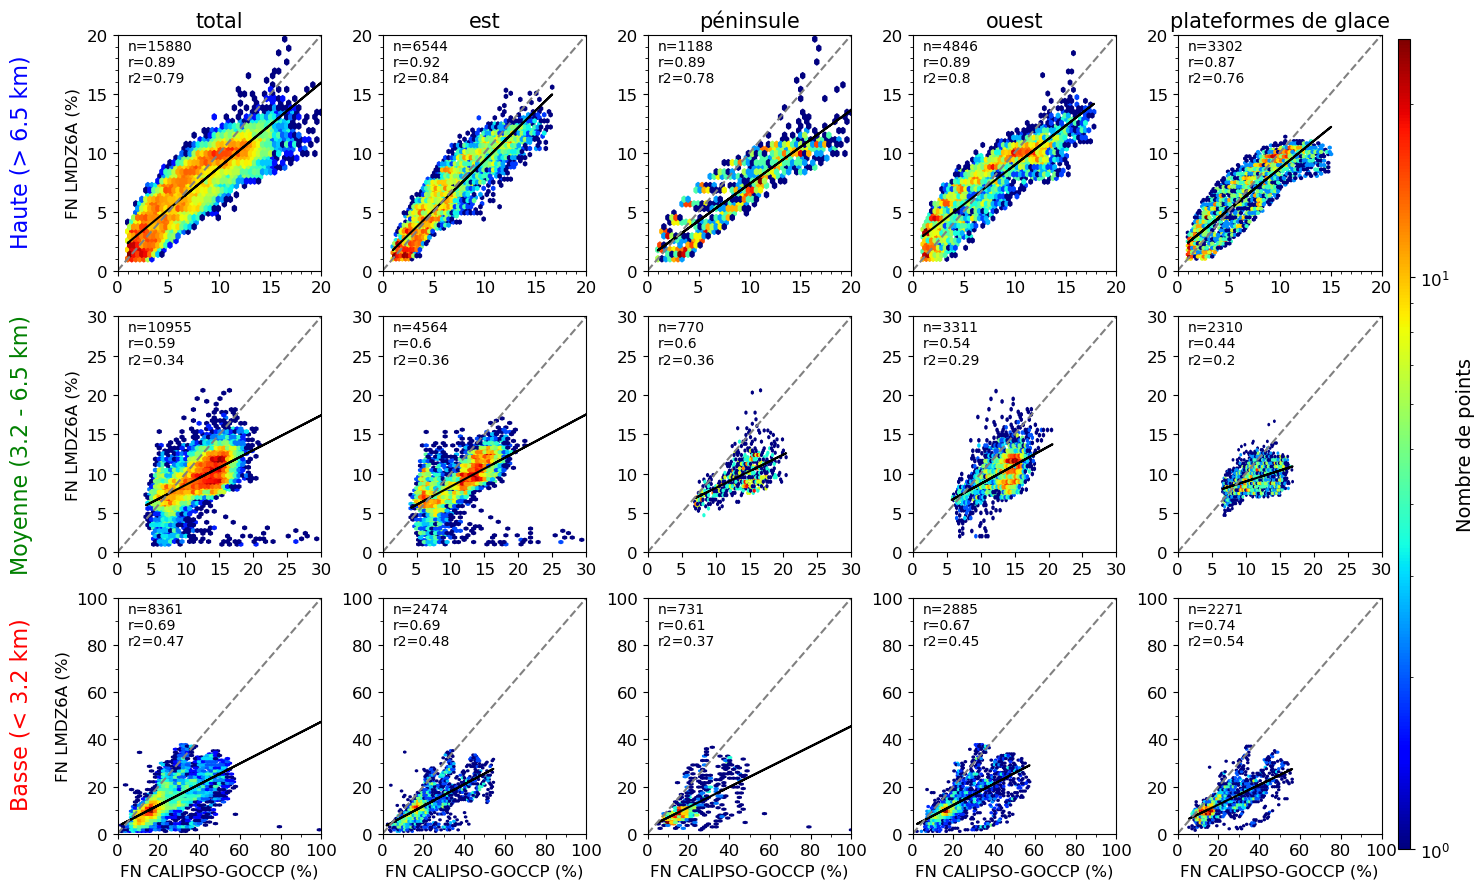

In [29]:
fig, axes = plt.subplots(figsize=(16,9), nrows=3, ncols=5)
pltcounter = 0 ; altcounter = 0 ; counter=0

fig.text(0.04, 0.825, 'Haute (> 6.5 km)', c='b', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.04, 0.5, 'Moyenne (3.2 - 6.5 km)', c='g', fontsize=16, va='center', ha='center', rotation='vertical')
fig.text(0.04, 0.2, 'Basse (< 3.2 km)', c='r', fontsize=16, va='center', ha='center', rotation='vertical')
label=None

for plotid in axes.flat:
    pltcounter = pltcounter + 1
    altcounter = (pltcounter - 1) % 4 + 1
        
    if pltcounter == 1 :
        plotid.set_title('total', size=15)
        clobs_plot = clobs_tot_h
        cllmdz6a_plot = cllmdz6a_tot_h
    if pltcounter == 2 : 
        plotid.set_title('est', size=15)
        clobs_plot = clobs_est_h
        cllmdz6a_plot = cllmdz6a_est_h
    if pltcounter == 3 : 
        plotid.set_title('péninsule', size=15)
        clobs_plot = clobs_peninsule_h
        cllmdz6a_plot = cllmdz6a_peninsule_h
    if pltcounter == 4 : 
        plotid.set_title('ouest', size=15)
        clobs_plot = clobs_ouest_h
        cllmdz6a_plot = cllmdz6a_ouest_h
    if pltcounter == 5 :
        plotid.set_title('plateformes de glace', size=15)
        clobs_plot = clobs_ice_shelves_h
        cllmdz6a_plot = cllmdz6a_ice_shelves_h
    if pltcounter == 6 :
        clobs_plot = clobs_tot_m
        cllmdz6a_plot = cllmdz6a_tot_m
    if pltcounter == 7 :
        clobs_plot = clobs_est_m
        cllmdz6a_plot = cllmdz6a_est_m
    if pltcounter == 8 :
        clobs_plot = clobs_peninsule_m
        cllmdz6a_plot = cllmdz6a_peninsule_m
    if pltcounter == 9 :
        clobs_plot = clobs_ouest_m
        cllmdz6a_plot = cllmdz6a_ouest_m
    if pltcounter == 10 :
        clobs_plot = clobs_ice_shelves_m
        cllmdz6a_plot = cllmdz6a_ice_shelves_m
    if pltcounter == 11 :
        clobs_plot = clobs_tot_l
        cllmdz6a_plot = cllmdz6a_tot_l
    if pltcounter == 12 :
        clobs_plot = clobs_est_l
        cllmdz6a_plot = cllmdz6a_est_l
    if pltcounter == 13 :
        clobs_plot = clobs_peninsule_l
        cllmdz6a_plot = cllmdz6a_peninsule_l
    if pltcounter == 14 :
        clobs_plot = clobs_ouest_l
        cllmdz6a_plot = cllmdz6a_ouest_l
    if pltcounter == 15 :
        clobs_plot = clobs_ice_shelves_l
        cllmdz6a_plot = cllmdz6a_ice_shelves_l
        label = 'x=y'
    if pltcounter in [11,12,13,14,15] :
        plotid.set_xlabel('FN CALIPSO-GOCCP (%)', size=12)
    if pltcounter in [1,6,11]: 
        plotid.set_ylabel('FN LMDZ6A (%)', size=12)

    if pltcounter in [1,2,3,4,5]:
        color = 'b'
        plotid.set_xlim(0,20)
        plotid.set_ylim(0,20)
        plotid.xaxis.set_minor_locator(MultipleLocator(1))
        plotid.yaxis.set_minor_locator(MultipleLocator(1))
    if pltcounter in [6,7,8,9,10]:
        color = 'g'
        plotid.set_xlim(0,30)
        plotid.set_ylim(0,30)
        plotid.xaxis.set_major_locator(MultipleLocator(5))
        plotid.yaxis.set_minor_locator(MultipleLocator(5))
    if pltcounter in [11,12,13,14,15]:
        color = 'r'
        plotid.set_xticks(np.arange(0,101,20))
        plotid.set_xlim(0,100)
        plotid.set_ylim(0,100)
        plotid.xaxis.set_minor_locator(MultipleLocator(10))
        plotid.yaxis.set_minor_locator(MultipleLocator(10))

    cs = plotid.hexbin(clobs_plot,cllmdz6a_plot, gridsize=50, mincnt=1, cmap='jet', bins='log')
    a,b = np.polyfit(clobs_plot,cllmdz6a_plot,1)
    r = np.corrcoef(clobs_plot, cllmdz6a_plot)[0, 1]
    r2 = r*r
    plotid.plot(clobs_plot, a*clobs_plot+b, c='k')
    plotid.axline((0, 0), slope=1, c='grey', linestyle='--', label=label)

    plotid.tick_params(axis='both', labelsize=12)
    plotid.text(0.05,0.8,'n={}\nr={}\nr2={}'.format(len(clobs_plot),np.round(r,2),np.round(r2,2)), transform = plotid.transAxes)
    #plotid.legend(loc='upper left')

    # plotid.xaxis.set_major_locator(MultipleLocator(10))
    # plotid.xaxis.set_minor_locator(MultipleLocator(5))
    # plotid.yaxis.set_major_locator(MultipleLocator(5))
    # plotid.yaxis.set_minor_locator(MultipleLocator(1))

#fig.suptitle('GOCCP (2007-2021, not 2016) & LMDZ6A (1980-1999) climatology', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(right=0.89, left=0.1, wspace=0.3)

cbar_ax = fig.add_axes([0.9, 0.05, 0.008, 0.9])
#fig.legend()
cb = fig.colorbar(cs, cax=cbar_ax)
cb.ax.tick_params(labelsize=12)
cb.set_label('Nombre de points', fontsize=14)
path_fig = '/home/jcharrel/Documents/M2_Internship_LMD/figures/3DCloudFraction/correlations'
fig.savefig(path_fig+'3DCloudFraction_climato_correlation_zones_density.png',dpi=300)